### Lab 1: Econometrics Analysis

#### Import Required Libraries

In [42]:
import os
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import time

#### Set Working Directory

In [43]:
# Define the working directory
dir_wd = "/Users/fabianfuentes/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/cursos/Econometrics/econometrics_mek"
os.chdir(dir_wd)

#### Load and Explore the Data

In [44]:
# Load the data (modify file type and name as needed)
data_t1 = pd.read_csv("Week 1/data/example.csv")

In [45]:
# Explore the data
data_t1.head()

,gender,educ,age,caruse,fast,unsafe,limit,offense,policy,contrib,limwar,accept,sig
0,0.0,4.0,43.0,18.0,4.0,13.0,19.0,19.0,17.0,21.0,10.0,32,4.653246
1,1.0,5.0,50.0,12.0,4.0,18.0,21.0,18.0,26.0,13.0,11.0,28,4.653246
2,0.0,5.0,25.0,18.0,3.0,11.0,14.0,18.0,19.0,16.0,10.0,20,4.653246
3,0.0,2.0,38.0,16.0,5.0,15.0,19.0,15.0,30.0,18.0,11.0,18,4.653246
4,0.0,6.0,60.0,12.0,5.0,13.0,17.0,17.0,26.0,23.0,10.0,25,4.653246


In [46]:
#how many rows and columns my data has?
data_t1.shape

(272, 13)

In [47]:
#let's get summary statistics for all variables
data_t1.info

<bound method DataFrame.info of      gender  educ   age  caruse  fast  unsafe  limit  offense  policy  \
0       0.0   4.0  43.0    18.0   4.0    13.0   19.0     19.0    17.0   
1       1.0   5.0  50.0    12.0   4.0    18.0   21.0     18.0    26.0   
2       0.0   5.0  25.0    18.0   3.0    11.0   14.0     18.0    19.0   
3       0.0   2.0  38.0    16.0   5.0    15.0   19.0     15.0    30.0   
4       0.0   6.0  60.0    12.0   5.0    13.0   17.0     17.0    26.0   
..      ...   ...   ...     ...   ...     ...    ...      ...     ...   
267     0.0   6.0  54.0    16.0   3.0    14.0   19.0     20.0    24.0   
268     0.0   4.0  32.0    22.0   4.0    10.0   13.0     25.0    13.0   
269     0.0   6.0  31.0    11.0   4.0    16.0   17.0     14.0    22.0   
270     1.0   5.0  31.0    13.0   3.0    13.0   18.0     19.0    21.0   
271     0.0   6.0  41.0    19.0   3.0    12.0    NaN     21.0    20.0   

     contrib  limwar  accept       sig  
0       21.0    10.0      32  4.653246  
1       1

#### Visualize Data

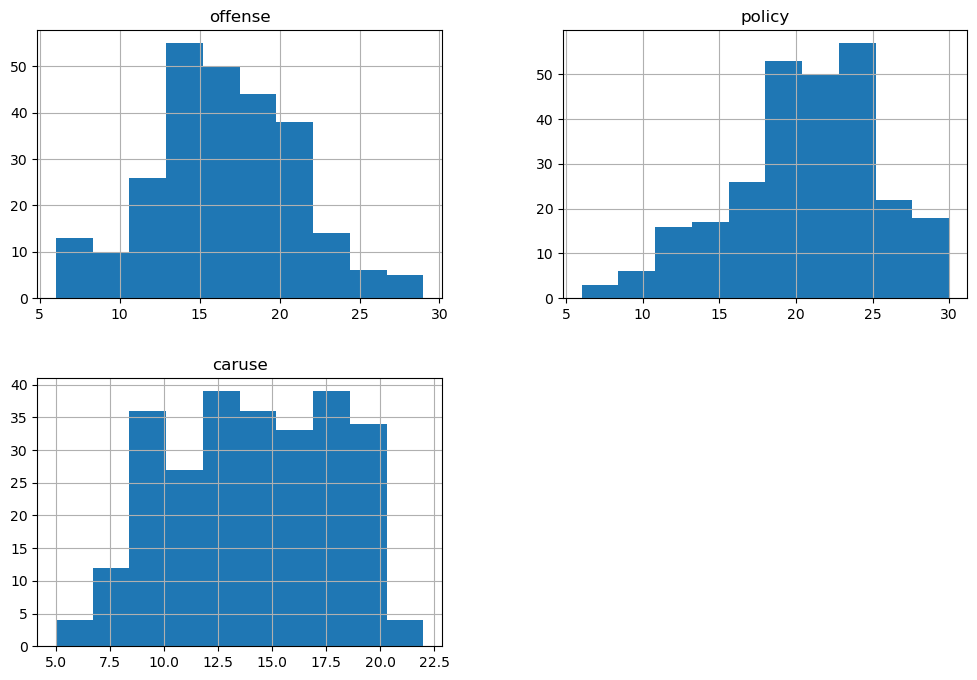

In [48]:
# Histograms of selected variables
data_t1.hist(column=['offense', 'policy', 'caruse'], figsize=(12, 8))
plt.show()

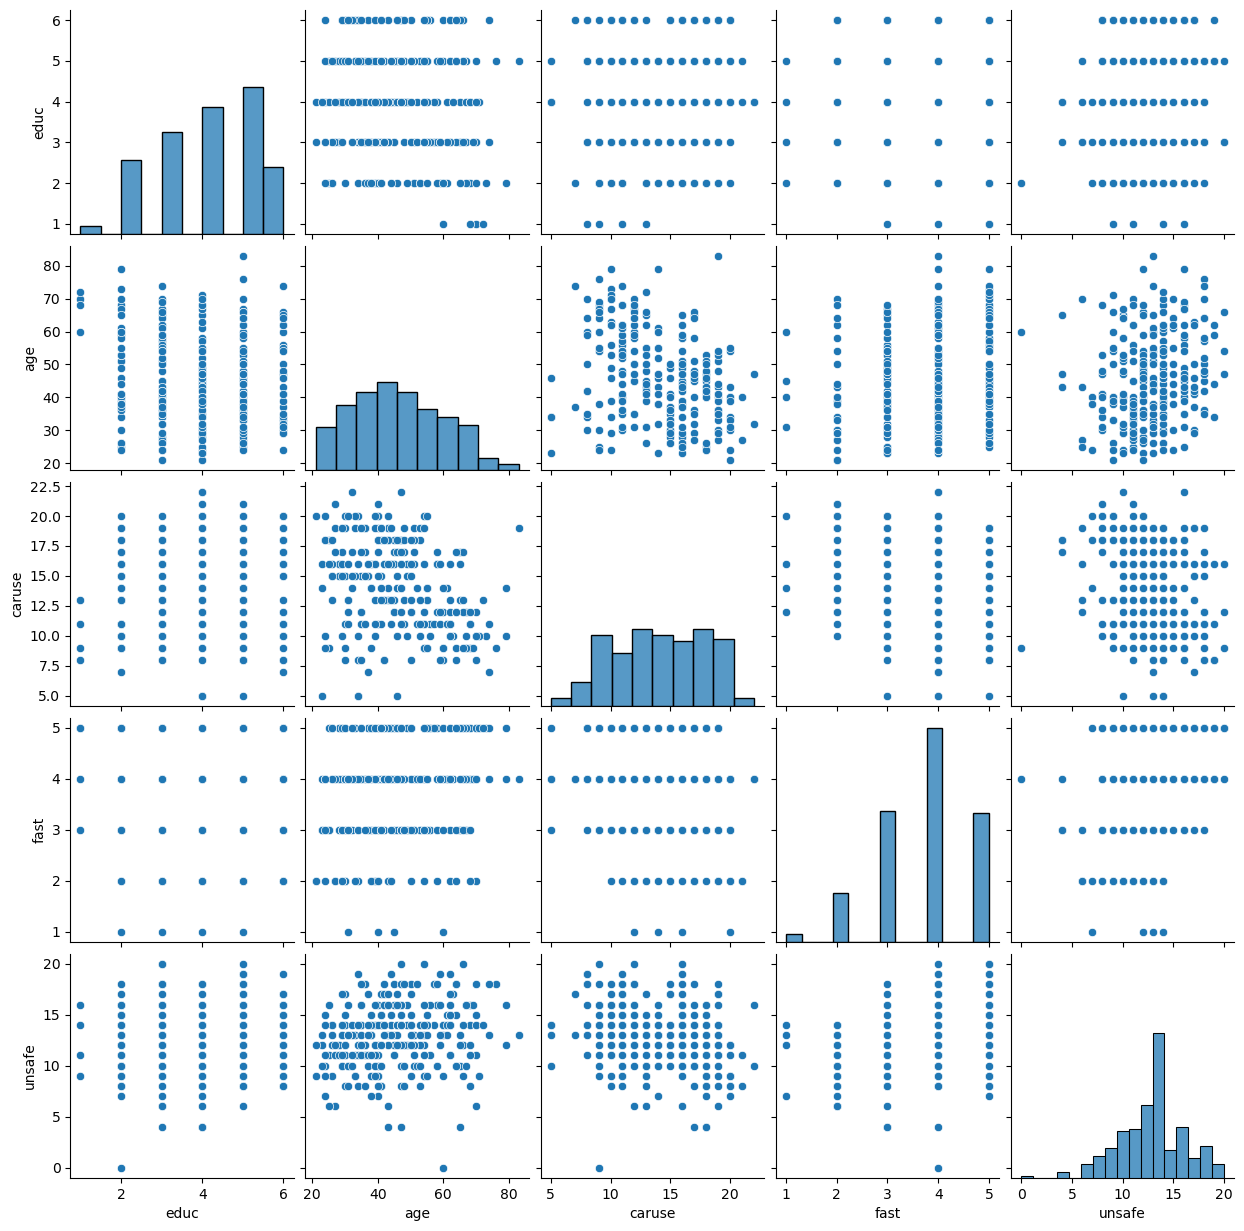

In [49]:
#what about scatter plots
sns.pairplot(data_t1[['educ', 'age', 'caruse', 'fast', 'unsafe']])


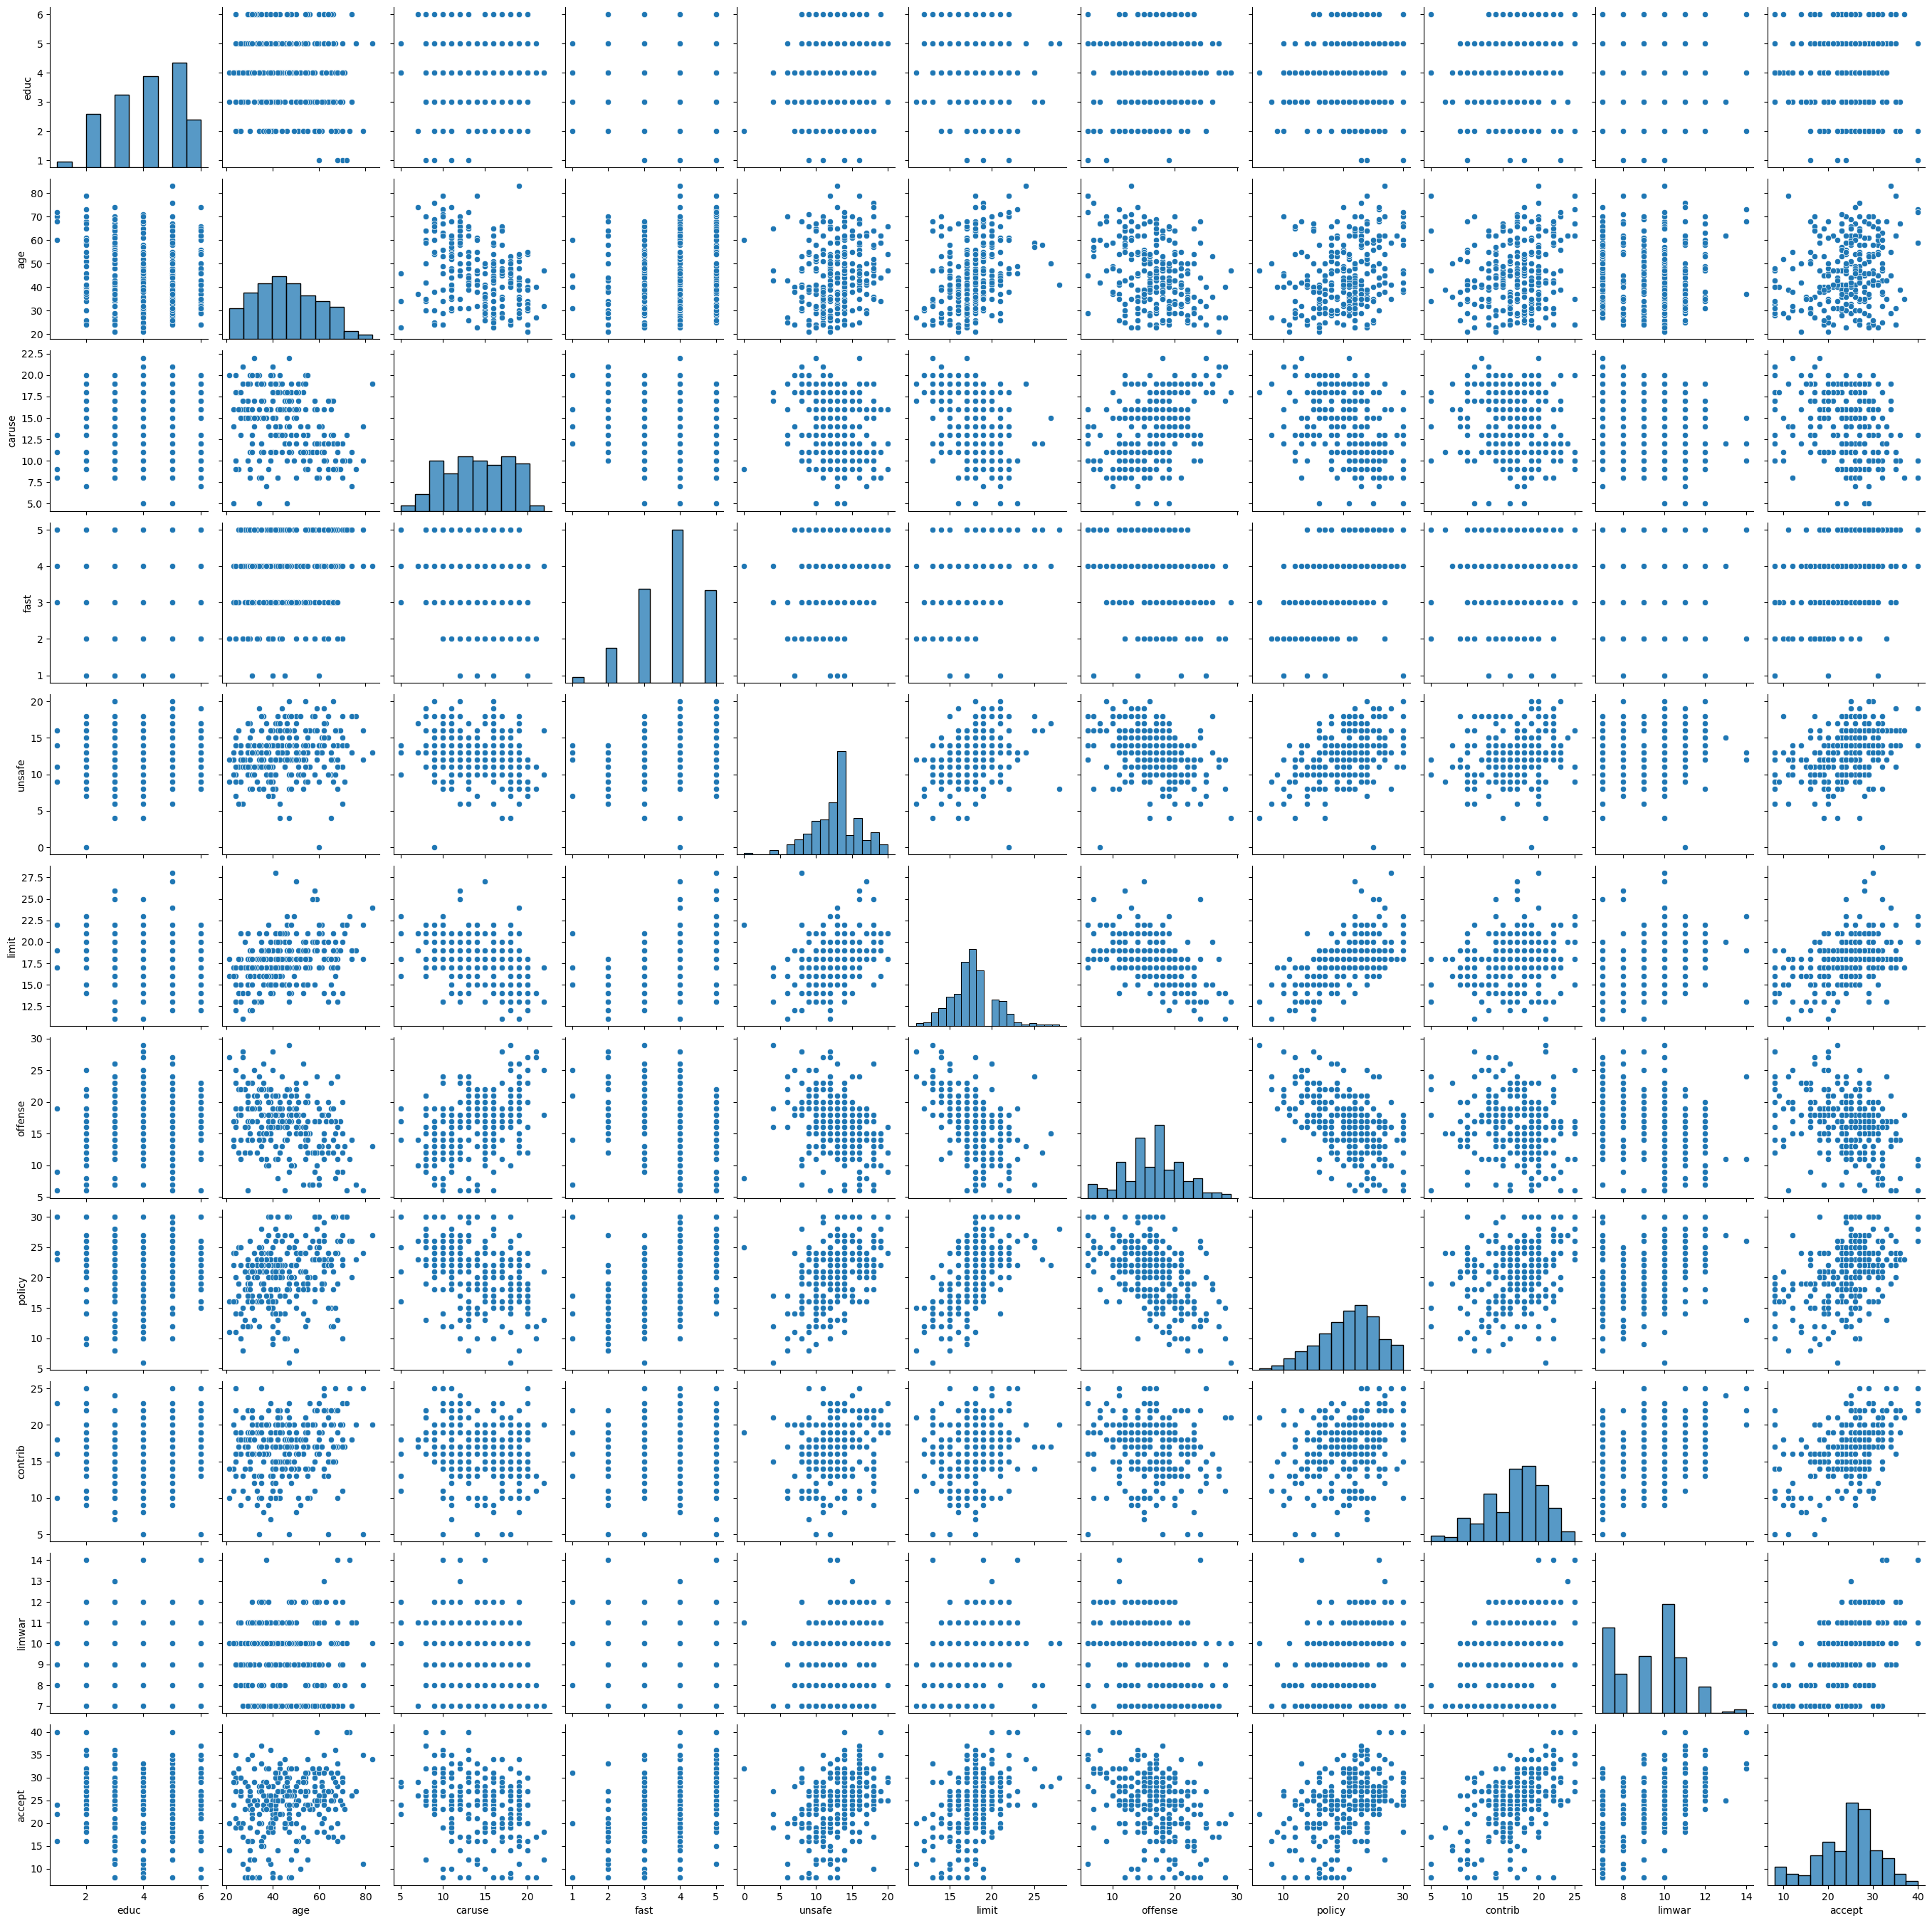

In [50]:
sns.pairplot(data_t1[['educ', 'age', 'caruse', 'fast', 'unsafe', 'limit', 'offense', 'policy', 'contrib', 'limwar', 'accept']])

#### Run a Regression Model

In [51]:
# Define dependent and independent variables

X = data_t1[['gender', 'educ', 'age', 'caruse', 'fast', 'unsafe', 'limit', 'offense']]
X = sm.add_constant(X)
Y = data_t1['accept']

# ommit na
X = X.dropna()
Y = Y.loc[X.index]

In [52]:
# Fit the model
model = sm.OLS(Y, X).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 accept   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     11.50
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           9.25e-14
Time:                        21:22:22   Log-Likelihood:                -767.03
No. Observations:                 245   AIC:                             1552.
Df Residuals:                     236   BIC:                             1584.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3740      4.831      2.561      0.0

#### Measure Execution Time

In [53]:
# Measure the time it takes to fit the model
start_time = time.time()
model = sm.OLS(Y, X).fit()
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

Execution time: 0.0032498836517333984 seconds


#### Extract Model Components

In [54]:
# Extract regression results
coefficients = model.params
residual_sum_of_squares = model.ssr
log_likelihood = model.llf
degrees_of_freedom = model.df_resid
fitted_values = model.fittedvalues
residuals = model.resid
sigma = model.scale
r_squared = model.rsquared
aic = model.aic

# Print key results
print("Coefficients:", coefficients)
print("Residual Sum of Squares:", residual_sum_of_squares)
print("Log Likelihood:", log_likelihood)
print("Degrees of Freedom:", degrees_of_freedom)
print("R-Squared:", r_squared)
print("AIC:", aic)

Coefficients: const      12.373981
gender      0.975417
educ       -0.028080
age         0.028772
caruse     -0.145748
fast        1.287505
unsafe      0.205457
limit       0.436976
offense    -0.172356
dtype: float64
Residual Sum of Squares: 7516.519909876125
Log Likelihood: -767.030979999588
Degrees of Freedom: 236.0
R-Squared: 0.28042799740247615
AIC: 1552.061959999176


#### Define a Custom Regression Function

In [59]:
def my_first_function(dependent_var, independent_vars, data):
    X = data[independent_vars]
    X = sm.add_constant(X)
    Y = data[dependent_var]
    
    # ommit na
    X = X.dropna()
    Y = Y.loc[X.index]

    model = sm.OLS(Y, X).fit()

    results = {
        'SSR': model.ssr,
        'LL': model.llf,
        'DF': model.df_resid,
        'RSquared': model.rsquared,
        'AIC': model.aic
    }
    return results

#### Use the Custom Function

In [60]:
result = my_first_function("accept", ["gender", "educ", "age", "caruse", "fast", "unsafe", "limit", "offense"], data_t1)
print(result)

{'SSR': 7516.519909876125, 'LL': -767.030979999588, 'DF': 236.0, 'RSquared': 0.28042799740247615, 'AIC': 1552.061959999176}


#### Generate All Variable Combinations and Fit Models

In [65]:
# Generate all combinations of variables
all_vars = data_t1.columns.tolist()
independent_var_combinations = []
for r in range(1, len(all_vars) + 1):
    independent_var_combinations.extend(combinations(all_vars, r))

# Fit models for all combinations
results = []
for combo in independent_var_combinations:
    try:
        result = my_first_function("accept", list(combo), data_t1)
        result['combination'] = combo
        results.append(result)
    except Exception as e:
        print(f"Error with combination {combo}: {e}")

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

In [66]:
results_df.head(20)

,SSR,LL,DF,RSquared,AIC,combination
0,1.144801e+04,-891.770141,269.0,3.393884e-02,1787.540282,"(gender,)"
1,1.156282e+04,-884.726986,266.0,2.870263e-03,1773.453972,"(educ,)"
2,1.113346e+04,-885.217330,268.0,5.272944e-02,1774.434660,"(age,)"
3,1.047733e+04,-860.494469,262.0,9.050891e-02,1724.988939,"(caruse,)"
4,9.919785e+03,-872.355066,269.0,1.633709e-01,1748.710132,"(fast,)"
5,1.022117e+04,-873.675583,268.0,1.192781e-01,1751.351166,"(unsafe,)"
6,9.236440e+03,-854.625449,266.0,1.974105e-01,1713.250899,"(limit,)"
7,1.001260e+04,-846.286842,259.0,1.346052e-01,1696.573684,"(offense,)"
8,9.101772e+03,-852.657345,266.0,2.162587e-01,1709.314689,"(policy,)"
9,8.494073e+03,-846.043947,267.0,2.833297e-01,1696.087894,"(contrib,)"


In [67]:
# Find the best model by R-Squared
best_model = results_df.loc[results_df['RSquared'].idxmax()]
print("Best Model:", best_model)

Best Model: SSR                     0.0
LL              8373.274519
DF                    270.0
RSquared                1.0
AIC           -16742.549038
combination       (accept,)
Name: 11, dtype: object
